In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('./exp4.rda')

In [3]:
data = read.csv('./TOD.rela.2.csv',row.names = 1)

In [4]:
ls()

[1] "data" "exp4"

In [8]:
head(data,3)

,TYPE,PH,Gender,race,Age,death,SUBJECT,TOD,Toxicology,subject,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Control,6.3,F,Asian,47,0,38,14.85,,105976,...,-0.006100768,-0.06413887,0.003604848,-0.03154435,0.00000814,-0.001946376,0.01816731,0.080291777,0.2381181,-0.094266320
3,Control,6.4,M,African American,59,0,3,0.92,,108022,...,0.234293937,-0.09116396,-0.046397010,0.12719771,-0.55944968,-0.033907364,-0.15330880,0.000730584,-0.1974440,0.000730584
4,Control,6.5,M,Caucasian,63,0,2,-0.57,,108291,...,-0.044956981,-0.05447319,0.119619796,0.15470826,-0.01450062,-0.007128116,-0.12830294,-0.131057729,0.1159251,0.322964274


In [6]:
dim(exp4)

[1]   251 11882

In [10]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [14]:
exp5 = exp4[!rownames(exp4) %in% data$GSM,]

In [ ]:
exp5$TYPE =ifelse(exp5$TYPE == 'MDD',1,0)

In [28]:
exp6 = exp5[,c('MUS81','UCK2','CNIH3','OTUD4')]

In [29]:
exp6[,1:dim(exp6)[2]] = 2^exp6[,1:dim(exp6)[2]] -1

In [30]:
exp6 = cbind(exp5$TYPE,exp6)

In [31]:
colnames(exp6)[1] = 'TYPE'

In [32]:
fold_pre <- glm(TYPE~MUS81+CNIH3+UCK2+OTUD4,data=exp6,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=exp6)

options(repr.plot.width = 6)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



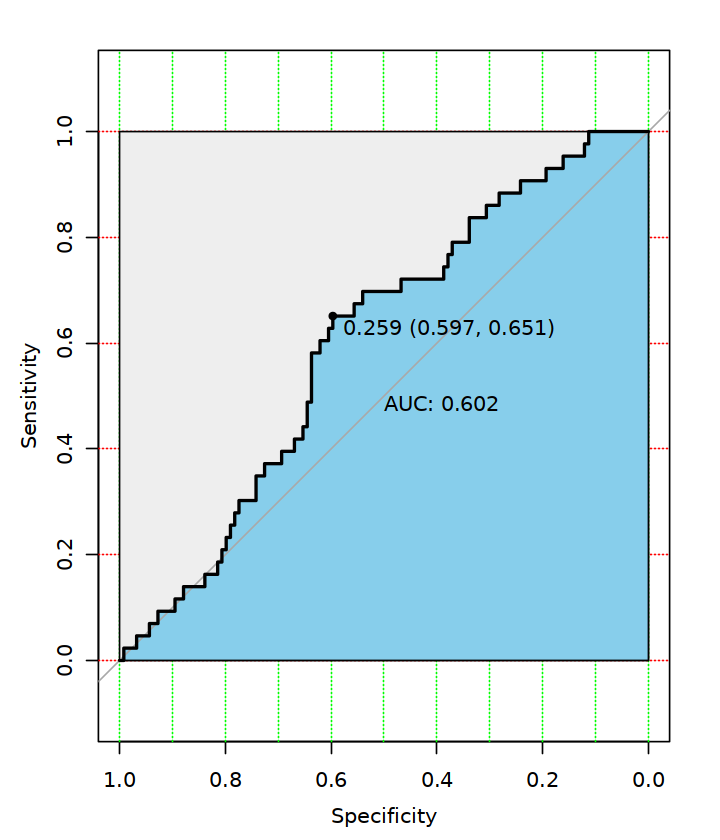

In [33]:
roc_curve <- pROC::roc(as.numeric(exp6$TYPE),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")